In [84]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [85]:
df=pd.read_csv(r"C:\Users\Abhishek\Desktop\capstone 3\SOCR-HeightWeight.csv")

In [86]:
df


,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [87]:
df.shape

(25000, 3)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [89]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [90]:
df["Height(feet)"] = df["Height(Inches)"] /12
df["Weight(kg)"] = df["Weight(Pounds)"] * 0.45359237

In [91]:
df=df.drop(["Height(Inches)","Weight(Pounds)"],axis=1 ,errors="ignore")

In [92]:
df.head()

,Index,Height(feet),Weight(kg)
0,1,5.481942,51.252536
1,2,5.959601,61.909598
2,3,5.783228,69.411834
3,4,5.684717,64.562251
4,5,5.648984,65.452064


In [93]:
df.columns.tolist()

['Index', 'Height(feet)', 'Weight(kg)']

In [94]:
df= df.set_index("Index")

In [95]:
df.head()

,Height(feet),Weight(kg)
Index,,
1,5.481942,51.252536
2,5.959601,61.909598
3,5.783228,69.411834
4,5.684717,64.562251
5,5.648984,65.452064


In [96]:
df.isnull().sum()

Height(feet)    0
Weight(kg)      0
dtype: int64

<Axes: xlabel='Weight(kg)', ylabel='Count'>

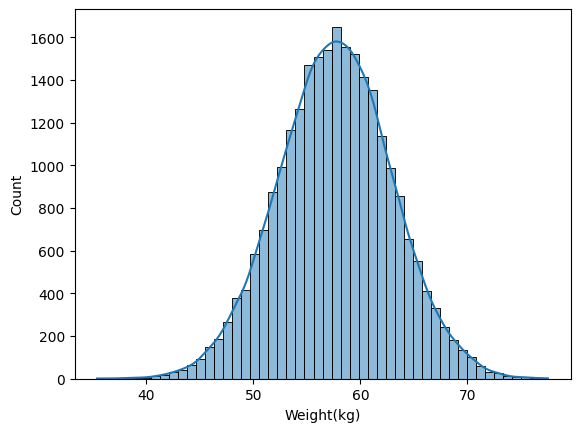

In [97]:
sns.histplot(df["Weight(kg)"],bins=50,kde=True)

<Axes: xlabel='Height(feet)', ylabel='Count'>

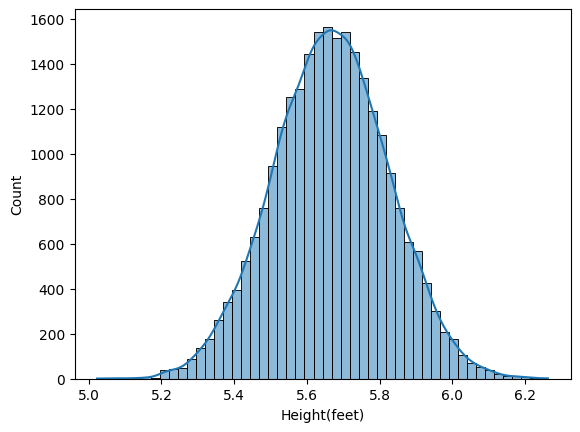

In [98]:
sns.histplot(df["Height(feet)"],bins=50,kde=True)

In [99]:
df.corr(numeric_only=True)

,Height(feet),Weight(kg)
Height(feet),1.000000,0.502859
Weight(kg),0.502859,1.000000


<Axes: >

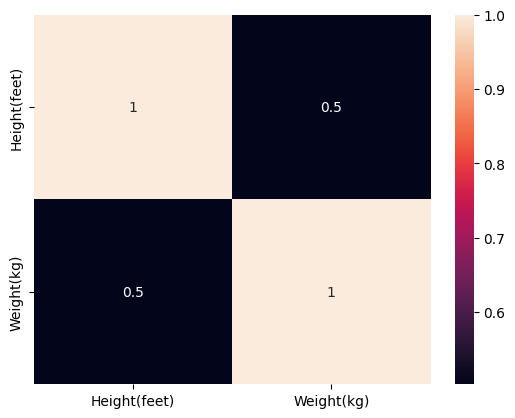

In [100]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [101]:
# X=df["Weight(kg)"]
# Y=df["Height(feet)"]

X=df["Height(feet)"]
Y=df["Weight(kg)"]

In [102]:
# X=df["Weight(kg)"].values.reshape(-1,1)
# Y=df["Height(feet)"].values


X=df["Height(feet)"].values.reshape(-1,1)
Y=df["Weight(kg)"].values

In [103]:
X_tain,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [104]:
model=LinearRegression()
model.fit(X_tain,Y_train)

LinearRegression()

In [105]:
#These tell you the relationship between height and weight.

#Interpretation:
#Slope: how much weight (kg) increases for each additional foot of height.
#Intercept: theoretical weight when height = 0 (not physically meaningful, but needed for the line equation).

print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)


Slope (Coefficient): 16.717119631023998
Intercept: -37.07521707904451


In [106]:
#Predict weights for test data
Y_pred = model.predict(X_test)


In [107]:
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
r2=r2_score(Y_test,Y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 21.08648136343091
Mean Absolute Error: 3.644509458383742
R-squared: 0.2605911351288859


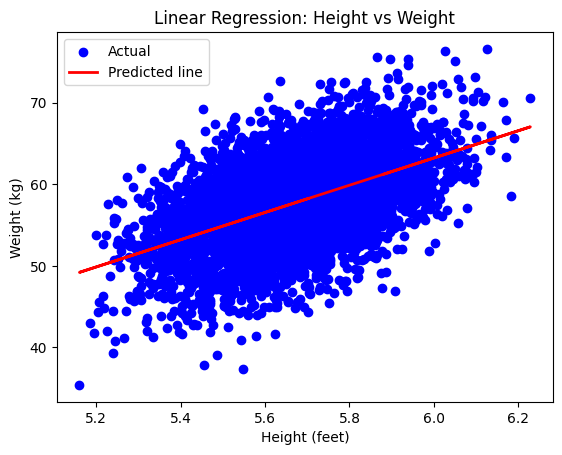

In [108]:
#visualize regression line

plt.scatter(X_test, Y_test, color='blue', label='Actual')
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Predicted line')
plt.xlabel("Height (feet)")
plt.ylabel("Weight (kg)")
plt.title("Linear Regression: Height vs Weight")
plt.legend()
plt.show()


In [ ]:
#predict new data

new_height = [[]]
predicted_weight = model.predict(new_height)
print( predicted_weight[0], "kg")


113.37885960017147 kg
